In [1]:
import torch
import torch.nn as nn                             #importing the nn library from torch, this is all the specific functions related to neural network
import torch.optim as optim                       #optim library which will define our optimser later
from torch .utils.data import Dataset,DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm                                       #library for loading architecture specific for image classification

import matplotlib.pyplot as plt                   #for data visualisation
import pandas as pd
import numpy as np                                #pandas and numpy used for data exploration

import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)


System Version: 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]
PyTorch version 2.1.2
Torchvision version 0.16.2
Numpy version 1.26.4
Pandas version 2.2.2


# Step 1. Pytorch Dataset (and Dataloader)
 the dataset is like the ingredients for a pytorch model

> Datasets are an organized way to structure how the datat and labels are loaded into the model.

> We can wrap the dataset in a dataloader and pytorch will handle batching and shuffling the data for us when we are training the model.

In [2]:
class PlayingCardDataset(Dataset): #creating a python class PlayingCardDataset which will inherit from pytorch's main datatset which we imported above
    def __init__(self, data_dir,transform = None): #the init method tells the class what to do when its created, datat_dir is where our data is stored , here the tranform resizes all the images to the same size 
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self): #the length method is important as the dataloader will need to know that how many examples do we have in a dataset once we have created it  
        return len(self.data) #returns langth of data
    
    def __getitem__(self, idx): #this method takes index location of an item in our dataset and will return one item
        return self.data[idx] #returns datat item of whatever index our getitem is called with
    
    @property
    def classes(self):
        return self.data.classes #will make it easier for us to find the class names

In [3]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/cards-image-datasetclassification/train')

In [4]:
len(dataset)

7624

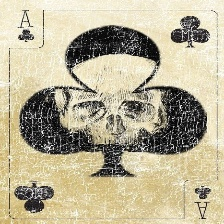

In [5]:
image, label=dataset[69]
image


In [6]:
image, label2=dataset[6908]
print(label2)

47


48


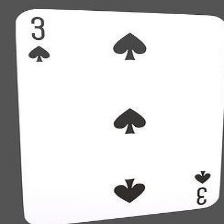

In [7]:
image, label3= dataset[6979] 
print(label3)
image

In [8]:
#getting a dictionary associating target values with folder names
data_dir='/kaggle/input/cards-image-datasetclassification/train'
target_to_class ={v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [9]:
transform = transforms.Compose([
    transforms.Resize((128,128)), #making sure that the image is always 128x128 in size
    transforms.ToTensor(), #converting it to a pytorch tensor
])

data_dir='/kaggle/input/cards-image-datasetclassification/train'
dataset= PlayingCardDataset(data_dir,transform)

In [10]:
dataset[100]
#image.shape

(tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
          [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
          ...,
          [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
          [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
          ...,
          [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
          [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],
 
         [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
          [0.0118, 0.0196, 0.3137,  ...,

In [11]:
image, label=dataset[100]
image.shape #here in the 3d image output 128,128 is because we have resized it and 3 is no.of channels, here they are the red green and blue channel

torch.Size([3, 128, 128])

In [12]:
#interating over the dataset
for image, label in dataset:
    break

In [13]:
image

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0784, 0.0824, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
         [0.7490, 0.7451, 0.7412,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0745, 0.0784, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
         [0.7451, 0.7451, 0.7373,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [14]:
label #gives the number associated with each label

0

# Dataloaders
> Batching our dataset

In [15]:
#batch size tells us how many of the examples we pull each time we iterate over the data loader 
#shuffle allows us to tell if we want eg. from our dataset to be pulled out randomly or in order
#shuffling is typically done when we are training the data, not need to shuffle the data when we are running it on a test set or validation set
#we are batching it because model runs much faster when it takes in batches of examples except one example at a time
 
dataloader = DataLoader(dataset, batch_size=32,shuffle=True)

In [16]:
for images, labels in dataloader:
    break

In [17]:
images #tensor just like before

tensor([[[[0.9765, 0.9843, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9843, 0.9843, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9922, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9922, 0.9922, 0.9373,  ..., 1.0000, 1.0000, 0.9922],
          [0.9882, 0.9882, 0.9882,  ..., 1.0000, 0.9961, 0.9843],
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 0.9922]],

         [[0.9922, 0.9922, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          [0.9882, 0.9922, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          [0.9843, 0.9882, 0.9882,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9922, 0.9922, 0.9373,  ..., 0.9961, 0.9961, 1.0000],
          [0.9882, 0.9882, 0.9882,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.9922, 0.9922,  ..., 0.9961, 1.0000, 1.0000]],

         [[0.9961, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9961],
          [0.9922, 0.9804, 0.9804,  ..., 0

In [18]:
images.shape #but shape of it has changed because our dataset has been batched into 32 examples

torch.Size([32, 3, 128, 128])

In [19]:
labels #they are random as they have been shuffled

tensor([10, 18, 17, 16, 12,  6, 28, 16, 29, 42, 33, 29, 19, 43, 11, 24, 36, 51,
        27,  9,  9, 15, 11,  9, 48, 26, 36,  9, 22, 44, 28, 42])

In [20]:
images.shape, labels.shape #labels is a pytorch tensor in one dimensons having 32 labels

(torch.Size([32, 3, 128, 128]), torch.Size([32]))